# Neural Network in Pytorch 

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [2]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
test_data = torchvision.datasets.MNIST(root='./data', transform=transforms.ToTensor())

In [4]:
train_loader = DataLoader(dataset=train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=100, shuffle=False)

In [5]:
exs = iter(train_loader)
samples, labels = exs.next()
print(samples.shape)

torch.Size([100, 1, 28, 28])


In [6]:
input_size = 28*28
hidden_size = 100
output_size = 10
num_epoches = 50
lr = 0.01

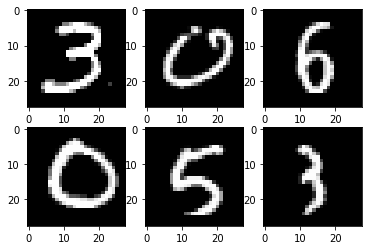

In [7]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap="gray")
plt.show()

# Creating Class For Neural Network

In [8]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    return x3


In [9]:
model = NeuralNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [10]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [11]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [14]:
model.to(device)

for epoch in range(num_epoches):
  for i, (images, labels) in enumerate(train_loader):
    #resize images
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print(f"epoch:{epoch}\t i:{i+1}\t loss:{loss.item()}")


epoch:0	 i:100	 loss:0.16881488263607025
epoch:0	 i:200	 loss:0.2066056877374649
epoch:0	 i:300	 loss:0.3918013870716095
epoch:0	 i:400	 loss:0.186104416847229
epoch:0	 i:500	 loss:0.06835402548313141
epoch:0	 i:600	 loss:0.08734573423862457
epoch:1	 i:100	 loss:0.09753868728876114
epoch:1	 i:200	 loss:0.11353752017021179
epoch:1	 i:300	 loss:0.13643920421600342
epoch:1	 i:400	 loss:0.25218266248703003
epoch:1	 i:500	 loss:0.1305164396762848
epoch:1	 i:600	 loss:0.06199654936790466
epoch:2	 i:100	 loss:0.062361858785152435
epoch:2	 i:200	 loss:0.012917202897369862
epoch:2	 i:300	 loss:0.07129337638616562
epoch:2	 i:400	 loss:0.05625869333744049
epoch:2	 i:500	 loss:0.06878867000341415
epoch:2	 i:600	 loss:0.10054969042539597
epoch:3	 i:100	 loss:0.04261987283825874
epoch:3	 i:200	 loss:0.01771981455385685
epoch:3	 i:300	 loss:0.08486058562994003
epoch:3	 i:400	 loss:0.04929414391517639
epoch:3	 i:500	 loss:0.028903689235448837
epoch:3	 i:600	 loss:0.1296624094247818
epoch:4	 i:100	 los

In [17]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    value, pred = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (pred == labels).sum().item()

  acc = 100.0*(n_correct/n_samples)
  print(acc)


99.595
